## Ordinary Least Square Linear Regression

### Simple Linear Regression

Full model fitting:

In [ ]:
import statsmodels.formula.api as smf
import itertools
def modelFitting(y, feature_set, data):
    formula = y + '~' + '+'.join(feature_set)
    model = smf.ols(formula=formula, data=data).fit()
    return model
def getCriterionValue(y, feature_set, data, modelname):
    # Fit model on feature_set and calculate RSS
    try:
        regr = modelFitting(y, feature_set, data);
        R2 = regr.rsquared;
        ar2 = regr.rsquared_adj;
        sse = regr.ssr;
        return {"model":[modelname], "SSE": [sse], "R2":[R2], "AR2": [ar2], "AIC": [regr.aic], "BIC": [regr.bic], "Pnum": [len(feature_set)]}
    except:
        return {"model": ["1"], "SSE": float("inf"), "R2": 0, "AR2": 0, "AIC": float("inf"), "BIC": float("inf"), "Pnum": 0}

In [ ]:
features=[ 'C(productID)','C(brandID)','C(attribute1)', 'C(attribute2)', 'C(attribute3)','attribute4', 'clickVolume', 'avgOriginalUnitPrice','avgFinalUnitPrice', 'ma14SalesVolume', 'C(weekday)', 'meanAge', 'gender','meanEducation', 'maritalStatus', 'plus', 'meanPurchasePower','meanUserLevel', 'meanCityLevel']
y='sales'
fullmodel=modelFitting(y,features,df)
getCriterionValue(y,features,df,'fullmodel')

{'model': 'fullmodel',
 'SSE': 1622596.2557716789,
 'R2': -0.8431554419840419,
 'AR2': -0.832294515359719,
 'AIC': 15611.037279476212,
 'BIC': 16163.389742329247,
 'Pnum': 19}

In [ ]:
fullmodel.pvalues[fullmodel.pvalues<0.05]

C(productID)[T.17]      5.888487e-03
C(productID)[T.60]      3.626779e-02
C(productID)[T.65]      2.609825e-03
C(brandID)[T.13]        1.399601e-02
C(brandID)[T.16]        2.609825e-03
C(attribute2)[T.90]     2.609825e-03
C(attribute3)[T.2]      2.999903e-02
C(weekday)[T.3]         4.461054e-02
C(weekday)[T.4]         2.607209e-02
C(weekday)[T.5]         2.382855e-02
clickVolume            1.791901e-252
avgFinalUnitPrice       4.146546e-06
ma14SalesVolume         2.556954e-09
dtype: float64

Confounding:

In [ ]:
# check if there exists confounding
model_lst=[]
for feature in features:
    model_lst.append(modelFitting(y,[feature],df))
    print(feature,':')
    print(model_lst[-1].pvalues[model_lst[-1].pvalues<=0.05])
    print()

C(productID) :
C(productID)[T.2]     3.133611e-02
C(productID)[T.3]     3.356703e-98
C(productID)[T.14]    1.869790e-04
C(productID)[T.20]    3.253767e-02
C(productID)[T.30]    4.361920e-03
C(productID)[T.44]    5.608325e-42
C(productID)[T.46]    2.043170e-13
C(productID)[T.54]    7.334337e-06
C(productID)[T.60]    3.731589e-16
C(productID)[T.65]    2.121025e-11
C(productID)[T.69]    2.216299e-02
C(productID)[T.72]    1.929199e-02
C(productID)[T.76]    9.284446e-03
dtype: float64

C(brandID) :
C(brandID)[T.11]    8.816018e-06
C(brandID)[T.12]    1.236705e-30
C(brandID)[T.16]    1.737662e-08
C(brandID)[T.17]    1.951483e-02
C(brandID)[T.18]    4.908117e-02
C(brandID)[T.22]    2.929069e-03
C(brandID)[T.28]    2.009160e-21
C(brandID)[T.29]    6.093647e-03
dtype: float64

C(attribute1) :
Series([], dtype: float64)

C(attribute2) :
Intercept               3.779071e-02
C(attribute2)[T.50]     9.629789e-03
C(attribute2)[T.90]     2.376781e-08
C(attribute2)[T.100]    1.441276e-05
dtype: float6

Features that perform differently from the fullmodel: \
avgOriginalUnitPrice, avgFinalUnitPrice, ma14SalesVolume,weekday, meanAge(0.05),gender(0.05),martialStatus(0.05)\
There may exist collinearity, but this is insignificant to prediction.

Other models that include different predictors:

In [ ]:
features=[ 'C(productID)','C(brandID)','C(attribute1)', 'C(attribute2)', 'C(attribute3)','attribute4', 'clickVolume', 'avgOriginalUnitPrice','avgFinalUnitPrice', 'ma14SalesVolume', 'C(weekday)', 'meanAge', 'gender','meanEducation', 'maritalStatus', 'plus', 'meanPurchasePower','meanUserLevel', 'meanCityLevel']# fullmodel
features1=[ 'C(productID)','C(brandID)', 'C(attribute2)', 'C(attribute3)', 'clickVolume', 'avgFinalUnitPrice', 'ma14SalesVolume']# drop insignificant variable
features2=[ 'C(productID)','C(brandID)', 'C(attribute2)', 'C(attribute3)', 'clickVolume', 'avgOriginalUnitPrice','avgFinalUnitPrice', 'ma14SalesVolume', 'C(weekday)', 'meanAge', 'gender','maritalStatus']# add confounding item
features3=['C(productID)','C(brandID)', 'C(attribute2)', 'C(attribute3)', 'clickVolume', 'avgOriginalUnitPrice','avgFinalUnitPrice', 'ma14SalesVolume', 'C(weekday)', 'meanAge', 'gender','maritalStatus','avgOriginalUnitPrice*avgFinalUnitPrice','ma14SalesVolume*clickVolume']#add interaction item on features2
features4=['C(productID)','C(brandID)','C(attribute1)', 'C(attribute2)', 'C(attribute3)','attribute4', 'clickVolume', 'avgOriginalUnitPrice','avgFinalUnitPrice', 'ma14SalesVolume', 'C(weekday)', 'meanAge', 'gender','meanEducation', 'maritalStatus', 'plus', 'meanPurchasePower','meanUserLevel', 'meanCityLevel','avgOriginalUnitPrice*avgFinalUnitPrice','ma14SalesVolume*clickVolume']# add interaction item on fullmodel
features5=[ 'C(productID)','C(brandID)', 'C(attribute2)', 'C(attribute3)', 'clickVolume', 'avgFinalUnitPrice', 'ma14SalesVolume','avgOriginalUnitPrice*avgFinalUnitPrice','ma14SalesVolume*clickVolume']# drop insignificant variable and adds interaction item

In [ ]:
feature_lst=[features,features1,features2,features3,features4,features5]
for feature in feature_lst:
    print(getCriterionValue(y,feature,df,feature_lst.index(feature)))
    print()

{'model': 0, 'SSE': 1622596.2557716789, 'R2': -0.8431554419840419, 'AR2': -0.832294515359719, 'AIC': 15611.037279476212, 'BIC': 16163.389742329247, 'Pnum': 19}

{'model': 1, 'SSE': 1642537.160886175, 'R2': -0.8412278999735163, 'AR2': -0.8320577182392802, 'AIC': 15598.287492671607, 'BIC': 16064.837631197957, 'Pnum': 7}

{'model': 2, 'SSE': 1623332.9129700866, 'R2': -0.8430842346998623, 'AR2': -0.8328990328953909, 'AIC': 15599.75261964802, 'BIC': 16119.929210878548, 'Pnum': 12}

{'model': 3, 'SSE': 1536082.4334259832, 'R2': -0.8515181028615184, 'AR2': -0.8416662234305291, 'AIC': 15516.684784021949, 'BIC': 16047.586665793313, 'Pnum': 14}

{'model': 4, 'SSE': 1535189.1190747798, 'R2': -0.8516044530512747, 'AR2': -0.8411128576177823, 'AIC': 15527.767988855432, 'BIC': 16090.845742249303, 'Pnum': 21}

{'model': 5, 'SSE': 1556230.410519105, 'R2': -0.8495705447115193, 'AR2': -0.8405609743745914, 'AIC': 15519.221943642986, 'BIC': 16001.86001798059, 'Pnum': 9}



Models with features3 and features4 have better performance.

In [ ]:
features6=[ 'C(productID)','C(brandID)', 'C(attribute2)', 'C(attribute3)', 'clickVolume', 'avgOriginalUnitPrice','avgFinalUnitPrice', 'ma14SalesVolume', 'C(weekday)', 'meanAge', 'gender','maritalStatus','avgOriginalUnitPrice*avgFinalUnitPrice','ma14SalesVolume*clickVolume','I(clickVolume**2)','I(ma14SalesVolume**2)']#add squared term on features3
features7=[ 'C(productID)','C(brandID)','C(attribute1)', 'C(attribute2)', 'C(attribute3)','attribute4', 'clickVolume', 'avgOriginalUnitPrice','avgFinalUnitPrice', 'ma14SalesVolume', 'C(weekday)', 'meanAge', 'gender','meanEducation', 'maritalStatus', 'plus', 'meanPurchasePower','meanUserLevel', 'meanCityLevel','avgOriginalUnitPrice*avgFinalUnitPrice','ma14SalesVolume*clickVolume','I(clickVolume**2)','I(ma14SalesVolume**2)']# add squared term on features4
features8=[ 'C(productID)','C(brandID)','C(attribute1)', 'C(attribute2)', 'C(attribute3)','attribute4', 'clickVolume', 'avgOriginalUnitPrice','avgFinalUnitPrice', 'ma14SalesVolume', 'C(weekday)', 'meanAge', 'gender','meanEducation', 'maritalStatus', 'plus', 'meanPurchasePower','meanUserLevel', 'meanCityLevel','avgOriginalUnitPrice*avgFinalUnitPrice','ma14SalesVolume*clickVolume','I(clickVolume**2)','I(ma14SalesVolume**2)','I(clickVolume**3)','I(ma14SalesVolume**3)']# add squared term and cubic term on features4
features9=[ 'C(productID)','C(brandID)', 'C(attribute2)', 'C(attribute3)', 'clickVolume', 'avgFinalUnitPrice', 'ma14SalesVolume','avgOriginalUnitPrice*avgFinalUnitPrice','ma14SalesVolume*clickVolume','I(clickVolume**2)','I(ma14SalesVolume**2)','I(clickVolume**3)','I(ma14SalesVolume**3)']# add sq and cubic terms on features5


In [ ]:
feature_lst.append(features6)
feature_lst.append(features7)
feature_lst.append(features8)
feature_lst.append(features9)
models=[]
dframe=[]
for feature in feature_lst:
    models.append(modelFitting(y,feature,df))
    print(getCriterionValue(y,feature,df,feature_lst.index(feature)))
    dframe.append(pd.DataFrame(getCriterionValue(y,feature,df,feature_lst.index(feature))))
#     print()
dd=pd.concat(dframe)

{'model': [0], 'SSE': [1622596.2557716789], 'R2': [0.8431554419840419], 'AR2': [0.832294515359719], 'AIC': [15611.037279476212], 'BIC': [16163.389742329247], 'Pnum': [19]}
{'model': [1], 'SSE': [1642537.160886175], 'R2': [0.8412278999735163], 'AR2': [0.8320577182392802], 'AIC': [15598.287492671607], 'BIC': [16064.837631197957], 'Pnum': [7]}
{'model': [2], 'SSE': [1623332.9129700866], 'R2': [0.8430842346998623], 'AR2': [0.8328990328953909], 'AIC': [15599.75261964802], 'BIC': [16119.929210878548], 'Pnum': [12]}
{'model': [3], 'SSE': [1536082.4334259832], 'R2': [0.8515181028615184], 'AR2': [0.8416662234305291], 'AIC': [15516.684784021949], 'BIC': [16047.586665793313], 'Pnum': [14]}
{'model': [4], 'SSE': [1535189.1190747798], 'R2': [0.8516044530512747], 'AR2': [0.8411128576177823], 'AIC': [15527.767988855432], 'BIC': [16090.845742249303], 'Pnum': [21]}
{'model': [5], 'SSE': [1556230.410519105], 'R2': [0.8495705447115193], 'AR2': [0.8405609743745914], 'AIC': [15519.221943642986], 'BIC': [16

In [ ]:
dd.set_index('model')

,SSE,R2,AR2,AIC,BIC,Pnum
model,,,,,,
0,1.622596e+06,0.843155,0.832295,15611.037279,16163.389742,19
1,1.642537e+06,0.841228,0.832058,15598.287493,16064.837631,7
2,1.623333e+06,0.843084,0.832899,15599.752620,16119.929211,12
3,1.536082e+06,0.851518,0.841666,15516.684784,16047.586666,14
4,1.535189e+06,0.851604,0.841113,15527.767989,16090.845742,21
5,1.556230e+06,0.849571,0.840561,15519.221944,16001.860018,9
6,1.079378e+06,0.895664,0.888591,14964.592511,15506.219683,16
7,1.077564e+06,0.895840,0.888324,14973.941740,15547.744784,23
8,1.047796e+06,0.898717,0.891851,14917.791632,15459.418804,25


Model 6, 7, 8, 9 have better performance. Finally model 9 is chosen.

### Train-Test MSE and RSS

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Kfold Cross validation:

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
df_train = pd.read_csv('..\data\Data-train.csv',index_col=0)
df_test = pd.read_csv('..\data\Data-test.csv',index_col=0)
df=pd.concat([df_train,df_test])
logvar=['sales','clickVolume','ma14SalesVolume']
for var in logvar:
    df[var]=df[var].map(lambda x:np.log(x) if x>0 else 0)
cat_var=['productID','brandID','attribute1','attribute2','attribute3','weekday']
for var in cat_var:
    df[var]=df[var].astype('category')
dropvar=['attribute1','attribute4','meanAge','gender','meanEducation','maritalStatus','plus','meanPurchasePower','meanUserLevel','meanCityLevel']
df=df.drop(dropvar,axis=1)
df['avgOriginalUnitPrice-avgFinalUnitPrice']=df['avgOriginalUnitPrice']*df['avgFinalUnitPrice']
df['ma14SalesVolume-clickVolume']=df['ma14SalesVolume']*df['clickVolume']
df['clickVolume_sq']=df['clickVolume']**2
df['ma14SalesVolume_sq']=df['ma14SalesVolume']**2
df['clickVolume_cub']=df['clickVolume']**3
df['ma14SalesVolume_cub']=df['ma14SalesVolume']**3
df=pd.get_dummies(df,drop_first=True)
df_train,df_test=df.iloc[:len(df_train)],df.iloc[len(df_train):]
def lr_Kfold_mean_MSE(k,df):
    kf=KFold(n_splits=k)
    train=[]
    test=[]
    for train_ix,test_ix in kf.split(df):
        train_data,test_data=df.iloc[train_ix],df.iloc[test_ix]
        train.append(train_data)
        test.append(test_data)
    MSE=[]
    for i in range(len(train)):
        lr=LinearRegression()
        lr.fit(train[i].drop('sales',axis=1),train[i].sales)
        y_true=test[i].sales
        y_pred=lr.predict(test[i].drop('sales',axis=1))
        MSE.append(mean_squared_error(np.exp(y_pred),np.exp(y_true)))
#         print(mean_squared_error(y_pred,y_true))
    return sum(MSE)/len(MSE)


In [ ]:
MSE_lst=[]
for i in range(2,21):
    MSE=lr_Kfold_mean_MSE(i,df_train)
    MSE_lst.append(MSE)
    print(i,':',MSE)
print('Best k=',MSE_lst.index(min(MSE_lst))+2,'mean MSE=',min(MSE_lst))

2 : 3808.5749880857893
3 : 1118.957712828671
4 : 1045.987323017539
5 : 962.0714670064369
6 : 1012.2226240953215
7 : 989.375290033507
8 : 984.0119404725671
9 : 989.6239665090658
10 : 996.4848032733062
11 : 1029.5447645932766
12 : 1004.4202334947962
13 : 1006.001536380339
14 : 1001.1859603738702
15 : 1013.5259822527994
16 : 1017.7430748970396
17 : 1010.2428102360248
18 : 1012.7651055930702
19 : 995.5106615225159
20 : 1006.8530743707155
Best k= 5 mean MSE= 962.0714670064369


In [ ]:
data=df_train
lr=LinearRegression()
lr.fit(data.drop('sales',axis=1),data.sales)
y_pred=lr.predict(df_test.drop('sales',axis=1))
dof=len(data)-len(lr.coef_)
resid=np.exp(lr.predict(data.drop('sales',axis=1)))-np.exp(data.sales)
RSS=np.sum(resid**2)
# sigma=np.sqrt(np.sum(resid**2)/dof)
# sigma
RSS

1323598.7231700248

## Regularization: Lasso and Ridge Regression

### Lasso regression

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
train=pd.read_csv('../data/Data-train.csv',index_col=0)
test=pd.read_csv('../data/Data-test.csv',index_col=0)
df=pd.concat([train,test])
logvar=['sales','clickVolume','ma14SalesVolume']
for var in logvar:
    df[var]=df[var].map(lambda x:np.log(x) if x>0 else 0)
cat_var=['productID','brandID','attribute1','attribute2','attribute3','weekday']
for var in cat_var:
    df[var]=df[var].astype('category')
dropvar=['attribute1','attribute4','meanAge','gender','meanEducation','maritalStatus','plus','meanPurchasePower','meanUserLevel','meanCityLevel']
df=df.drop(dropvar,axis=1)
df['avgOriginalUnitPrice-avgFinalUnitPrice']=df['avgOriginalUnitPrice']*df['avgFinalUnitPrice']
df['ma14SalesVolume-clickVolume']=df['ma14SalesVolume']*df['clickVolume']
df['clickVolume_sq']=df['clickVolume']**2
df['ma14SalesVolume_sq']=df['ma14SalesVolume']**2
df['clickVolume_cub']=df['clickVolume']**3
df['ma14SalesVolume_cub']=df['ma14SalesVolume']**3
df=pd.get_dummies(df,drop_first=True)

In [ ]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler(with_mean=False)
X=df.drop(['sales'],axis=1)
X_stan=pd.DataFrame(ss.fit_transform(X),columns=X.columns)
train_stanX,test_stanX=X_stan.iloc[:len(train)],X_stan.iloc[len(train):]
train,test=df.iloc[:len(train)],df.iloc[len(train):]
train_y=train.sales

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
params=[0.001,0.01,0.1,1,10,100,1000]
def lasso_MSE(param,X_train_stan,y_train,X_test_stan,y_test):
    lasso=Lasso(alpha=param,max_iter=100000)
    lasso.fit(X_train_stan,y_train)
    MSE=mean_squared_error(np.exp(lasso.predict(X_test_stan)),np.exp(y_test))
#     MSE=mean_squared_error(np.exp(lasso.predict(X_test_stan)),np.exp(y_test))
    return MSE
def Lasso_Kfold_mean_MSE(alpha,k):
    kf=KFold(n_splits=k)
    MSElst=[]
    for train_index,test_index in kf.split(train):
        X_train_stan,X_test_stan=train_stanX.iloc[train_index],train_stanX.iloc[test_index]
        y_train,y_test=train_y.iloc[train_index],train_y.iloc[test_index]
        MSE=lasso_MSE(alpha,X_train_stan,y_train,X_test_stan,y_test)
        MSElst.append(MSE)
    return sum(MSElst)/len(MSElst)
mean_MSE_lst=[]
for alpha in params:
    mean_MSE=Lasso_Kfold_mean_MSE(alpha,5)
    mean_MSE_lst.append(mean_MSE)
    print("k-fold CV at alpha=",alpha,":MSE=",mean_MSE)
print()
print("The best Lasso parameter alpha=",params[mean_MSE_lst.index(min(mean_MSE_lst))])


k-fold CV at alpha= 0.001 :MSE= 5507.839378854045
k-fold CV at alpha= 0.01 :MSE= 4669.538803006557
k-fold CV at alpha= 0.1 :MSE= 1886.6725599177983
k-fold CV at alpha= 1 :MSE= 6690.963099998223
k-fold CV at alpha= 10 :MSE= 7164.055774950319
k-fold CV at alpha= 100 :MSE= 7164.055774950319
k-fold CV at alpha= 1000 :MSE= 7164.055774950319

The best Lasso parameter alpha= 0.1


### Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
params=[0.001,0.01,0.1,1,10,100,1000]
def ridge_MSE(param,X_train_stan,y_train,X_test_stan,y_test):
    ridge=Ridge(alpha=param)
    ridge.fit(X_train_stan,y_train)
    MSE=mean_squared_error(np.exp(ridge.predict(X_test_stan)),np.exp(y_test))
#     MSE=mean_squared_error(np.exp(lasso.predict(X_test_stan)),np.exp(y_test))
    return MSE
def Ridge_Kfold_mean_MSE(alpha,k):
    kf=KFold(n_splits=k)
    MSElst=[]
    for train_index,test_index in kf.split(train):
        X_train_stan,X_test_stan=train_stanX.iloc[train_index],train_stanX.iloc[test_index]
        y_train,y_test=train_y.iloc[train_index],train_y.iloc[test_index]
        MSE=ridge_MSE(alpha,X_train_stan,y_train,X_test_stan,y_test)
        MSElst.append(MSE)
    return sum(MSElst)/len(MSElst)
mean_MSE_lst=[]
for alpha in params:
    mean_MSE=Ridge_Kfold_mean_MSE(alpha,5)
    mean_MSE_lst.append(mean_MSE)
    print("k-fold CV at alpha=",alpha,":MSE=",mean_MSE)
print()
print("The best Ridge parameter alpha=",params[mean_MSE_lst.index(min(mean_MSE_lst))])

k-fold CV at alpha= 0.001 :MSE= 959.6903367093679
k-fold CV at alpha= 0.01 :MSE= 947.2110418786458
k-fold CV at alpha= 0.1 :MSE= 1202.839779355772
k-fold CV at alpha= 1 :MSE= 3426.1407416870497
k-fold CV at alpha= 10 :MSE= 6359.708554455656
k-fold CV at alpha= 100 :MSE= 4151.270581748719
k-fold CV at alpha= 1000 :MSE= 1416.2394115322236

The best Ridge parameter alpha= 0.01


In [ ]:
X_train_stan,X_test_stan,y_train,y_test = train_test_split(train_stanX,train_y, test_size=0.2,random_state =30)
ridge=Ridge(alpha=0.01)
ridge.fit(X_train_stan,y_train)
mean_squared_error(np.exp(ridge.predict(X_test_stan)),np.exp(y_test))

1321.5171859055395

Prediction on Data-train and obtain the residuals.

In [ ]:
ridge=Ridge(alpha=0.01)
ridge.fit(train_stanX,train_y)
y_pred=ridge.predict(test_stanX)
y_fit=ridge.predict(train_stanX)
resid=np.exp(y_fit)-np.exp(train.sales)

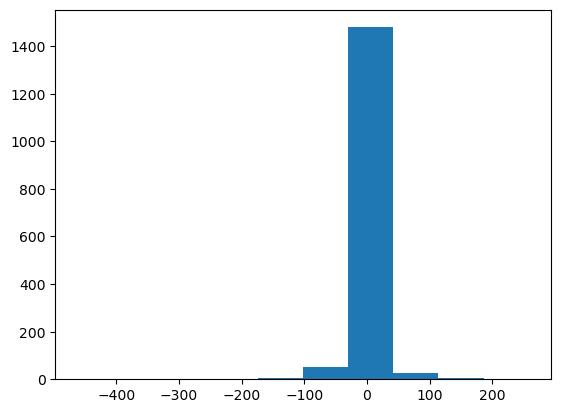

1285931.5610557084

In [ ]:
import matplotlib.pyplot as plt
plt.hist(resid.values)
plt.show()
sum(resid**2)

In [ ]:
train_stanX.columns[ridge.coef_<0.0001]

Index(['clickVolume', 'avgOriginalUnitPrice', 'avgFinalUnitPrice',
       'ma14SalesVolume', 'ma14SalesVolume_sq', 'clickVolume_cub',
       'productID_4', 'productID_6', 'productID_7', 'productID_11',
       'productID_12', 'productID_14', 'productID_17', 'productID_20',
       'productID_22', 'productID_24', 'productID_26', 'productID_33',
       'productID_34', 'productID_35', 'productID_37', 'productID_41',
       'productID_44', 'productID_45', 'productID_46', 'productID_52',
       'productID_53', 'productID_54', 'productID_58', 'productID_65',
       'productID_67', 'productID_69', 'productID_72', 'productID_76',
       'productID_78', 'productID_79', 'productID_80', 'brandID_3',
       'brandID_4', 'brandID_6', 'brandID_10', 'brandID_11', 'brandID_12',
       'brandID_13', 'brandID_15', 'brandID_16', 'brandID_18', 'brandID_22',
       'brandID_26', 'brandID_27', 'brandID_29', 'brandID_35', 'brandID_36',
       'brandID_39', 'brandID_40', 'brandID_42', 'attribute2_50.0',
       